In [2]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame with the feature data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df.to_csv('iris.csv', index=False)

In [3]:
# Add the target variable to the DataFrame
df['target'] = iris.target

# Optionally, display the first few rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
# scaling the dataset 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled['target'] = df['target']
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [39]:
# let's visualize the data
# because it has 4 features, we can't visualize it in 2D
# we can use PCA to reduce the number of dimensions to 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.iloc[:, :-1])
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['target'] = df_scaled['target']
df_pca.head()

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


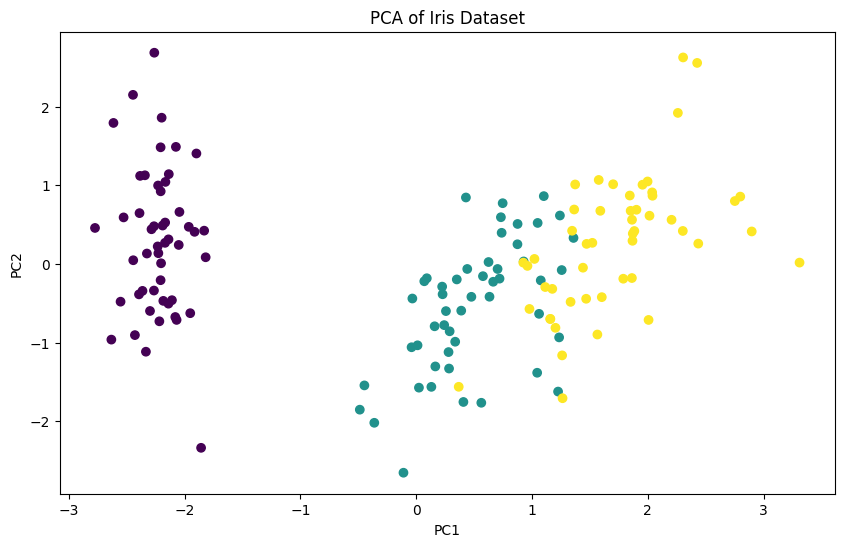

In [40]:
# plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['target'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Iris Dataset')
plt.show()

In [14]:
# Let's the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df_scaled.iloc[:, :-1] # Features
y = df_scaled.iloc[:, -1] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## k - Nearest Neighbor Algorithm

kNN does not have a training phase, it does not explicity model the data.
It rather keeps the training set and does the prediction directly when test data is presented. 

So, basically for each test datapoint, the label will be the majority of the k nearest neighbors' labels. 


We can use Euclidian distance.

<div align="center">

$D_{ij} = \sqrt{ (x_{i} - x_{j})^2}$

</div>



In [28]:
# designing kNN model from scratch
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train] # calculate the distances 
        k_indices = np.argsort(distances)[:self.k] # get the indices of the k-nearest neighbors 
        k_nearest_labels = [self.y_train[i] for i in k_indices] # get the labels of the k-nearest neighbors
        most_common = np.bincount(k_nearest_labels).argmax() # get the most common class label
        return most_common


In [43]:
# initialize kNN classifier and make predictions
kNN_classifier = KNN(k=1)
kNN_classifier.fit(X_train.values, y_train.values)
kNN_predictions = kNN_classifier.predict(X_test.values)
kNN_predictions


array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [44]:
# evaluate the model using accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test, kNN_predictions))
print('Precision:', precision_score(y_test, kNN_predictions, average='weighted'))
print('Recall:', recall_score(y_test, kNN_predictions, average='weighted'))
print('F1 Score:', f1_score(y_test, kNN_predictions, average='weighted'))

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1 Score: 0.9664109121909632
